In [33]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#For implementing linear regession
import statsmodels.api as sm
# Load the "mpg" dataset from seaborn's GitHub repository
df = sns.load_dataset('mpg')

# Alternatively, you can load the "mpg" dataset directly from the UCI Machine Learning Repository:
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])


In [35]:
#Explore the dataset by performing the following tasks: Display the first few rows of the dataset using the head() function to verify its contents.
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [36]:
#Use the info() function to get an overview of the dataset, including column names, data types, and missing values.
#Calculate summary statistics of the dataset using the describe() function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

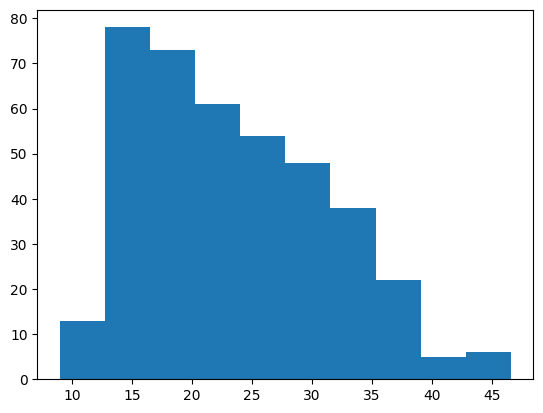

In [38]:
#Create a histogram of a numerical variable using seaborn's distplot() or matplotlib's hist() function to visualize its distribution.

plt.hist(df['mpg'])

<Axes: xlabel='weight', ylabel='mpg'>

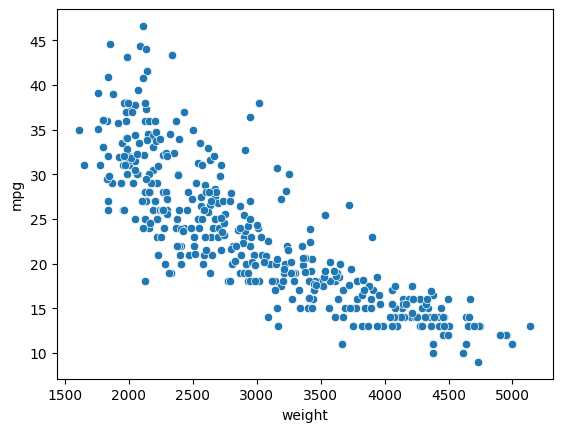

In [39]:
#Create a scatter plot of two numerical variables using seaborn's scatterplot() or matplotlib's scatter() function to identify any potential relationships.
sns.scatterplot(data=df, x="weight", y="mpg")

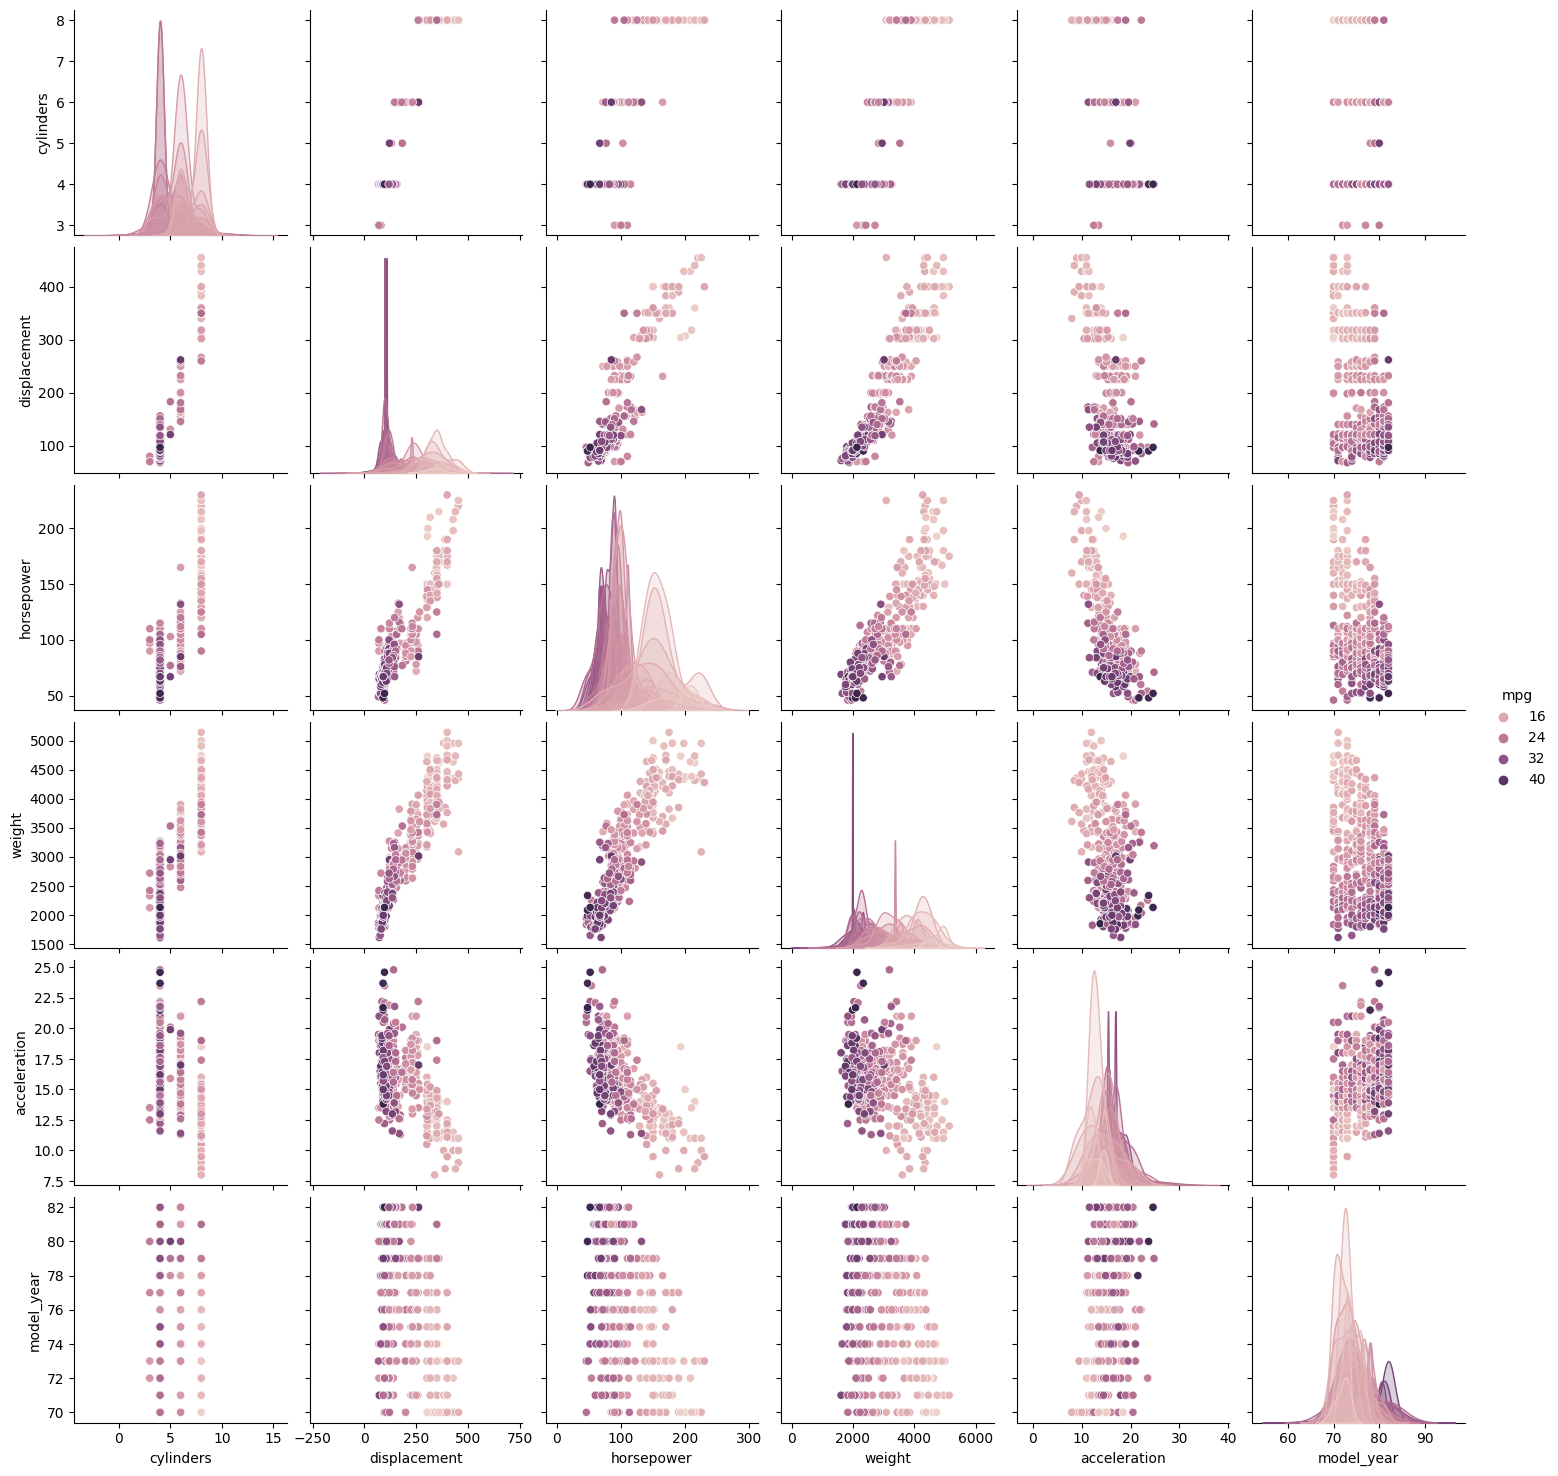

In [40]:
#Create a pairplot
sns.pairplot(df, hue="mpg")

In [41]:
#Identify candidates for linear regression:
df.corr()

<ipython-input-41-360287253a3e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<ipython-input-42-0a3cd13aeaf5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


<Axes: >

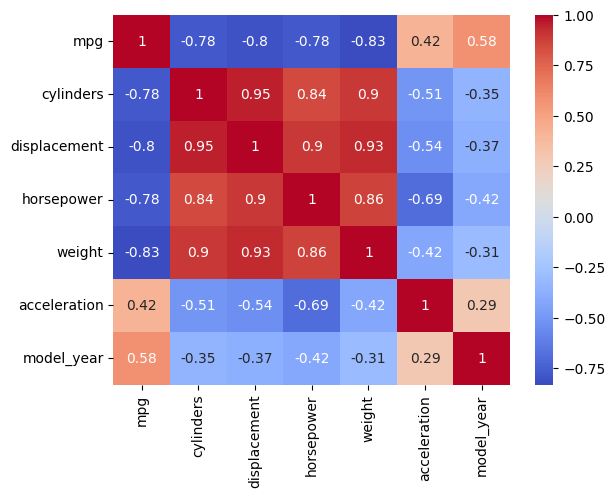

In [42]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [43]:
from sklearn.model_selection import train_test_split

mean_horsepower=df.horsepower.mean()
df.horsepower = df.horsepower.fillna(mean_horsepower)
X= df.weight
y= df.horsepower

X_train, X_test, y_train, y_test = (train_test_split(X, y,
                                                    test_size =0.33, random_state=42))

In [44]:
print(X.isnull().sum())
print(y.isnull().sum())

0
0


In [45]:
#Identify two numerical variables that seem to exhibit a linear relationship.
#Note down the names of these variables, as they will be used for implementing linear regression.
X=df['weight'] #This is a CAPITAL X because is the independant variable
y=df['horsepower']

<Axes: xlabel='weight', ylabel='horsepower'>

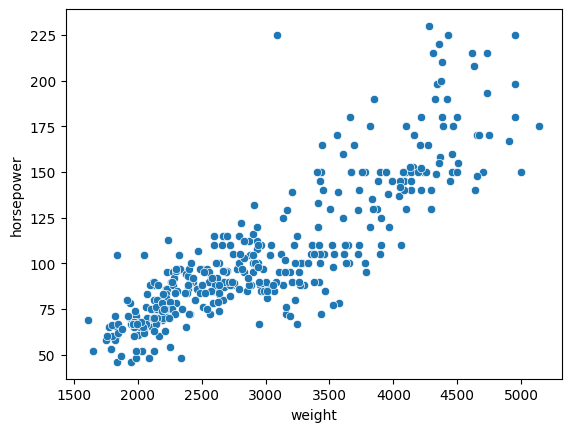

In [46]:
#Create an instance of the linear regression model using statsmodels LinearRegression() class.
sns.scatterplot(x=X,y=y)

In [47]:
serie1=pd.Series(np.random.uniform(0,1500,50))
serie2=pd.Series(np.random.uniform(4000,5500,50))
X_test=pd.concat([serie1, serie2], ignore_index=True)

In [48]:
#Fit the model to the training data using the fit() method, passing in X_train and y_train as arguments.
model=sm.OLS(y,X).fit()
y_pred=model.predict(X_test) #The most important part of the code

In [49]:
y_pred

0      46.473557
1      37.115389
2      45.617999
3      13.881303
4      15.716649
         ...    
95    190.492561
96    165.575981
97    182.827766
98    183.802961
99    175.783617
Length: 100, dtype: float64

Text(0.5, 1.0, 'My second prediction - Minicase 2 😎')

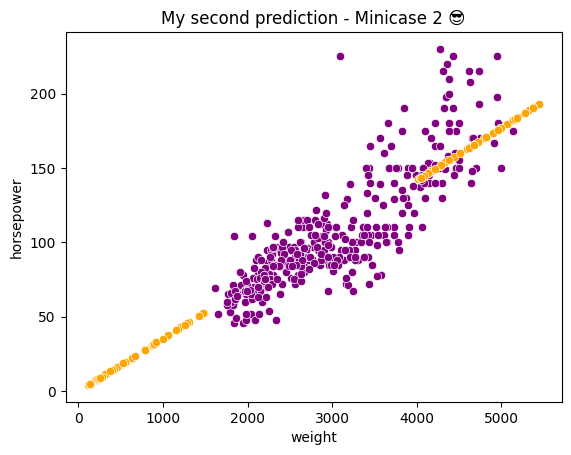

In [52]:
sns.scatterplot(x=X, y=y, color="purple")
sns.scatterplot(x=X_test, y=y_pred, color="orange")
plt.title("My second prediction - Minicase 2 😎")